# <font color=green>OSA case study</font>
## <font color=dark>Feature Selection: 1.- Filter, Univariate <font>


### See some references on Feature Selection such as:

https://machinelearningmastery.com/feature-selection-machine-learning-python/

https://scikit-learn.org/stable/modules/feature_selection.html

https://www.kaggle.com/jepsds/feature-selection-using-selectkbest

<font size= 5 color=magenta>----------------------------------------------------------------</font>
<font size= 5 color=magenta>----------------------------------------------------------------</font>

## Read the aggregated (clinical variables + speecg featores) Excel file for exteme male cases

In [1]:
# Import pandas
import pandas as pd

# Read Excell with extreme male cases
file = 'OSA_Aggregated_UPM.xlsx'

# Load spreadsheet
xl = pd.ExcelFile(file)

# Print the sheet names
print(xl.sheet_names)


['Sheet1']


In [2]:

# Load a sheet into a DataFrame by name: df_OSA_extreme
df_OSA_inner = xl.parse('Sheet1')

In [4]:
df_OSA_inner.head(2)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI,A_Form1,...,O_Ancho3,O_Ancho4,U_Form1,U_Form2,U_Form3,U_Form4,U_Ancho1,U_Ancho2,U_Ancho3,U_Ancho4
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927,746.822118,...,164.953071,223.771504,328.075500,757.032914,2565.730496,3024.500134,74.718076,88.331369,128.496457,379.432142
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906,741.095216,...,74.584464,216.244108,337.409601,735.000000,2532.000000,4132.186568,68.657539,192.000000,134.000000,264.337720


<font size= 5 color=magenta>----------------------------------------------------------------</font>
<font size= 5 color=magenta>----------------------------------------------------------------</font>

## Remember operations using groupby()

* ### See, for example [Summarising, aggregation and grouping data in python pandas](https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/)

In [33]:
df_OSA_inner.groupby('OSA')['OSA'].describe()

,count,unique,top,freq
OSA,,,,
Healthy,91,1,Healthy,91
Severe,83,1,Severe,83


In [32]:
df_OSA_inner.groupby('OSA')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
OSA,,,,,,,,
Healthy,91.0,28.230731,4.125376,22.835010,25.452390,27.173119,30.103806,43.428571
Severe,83.0,32.333071,6.122230,21.357796,28.237795,31.314566,35.180151,52.298554


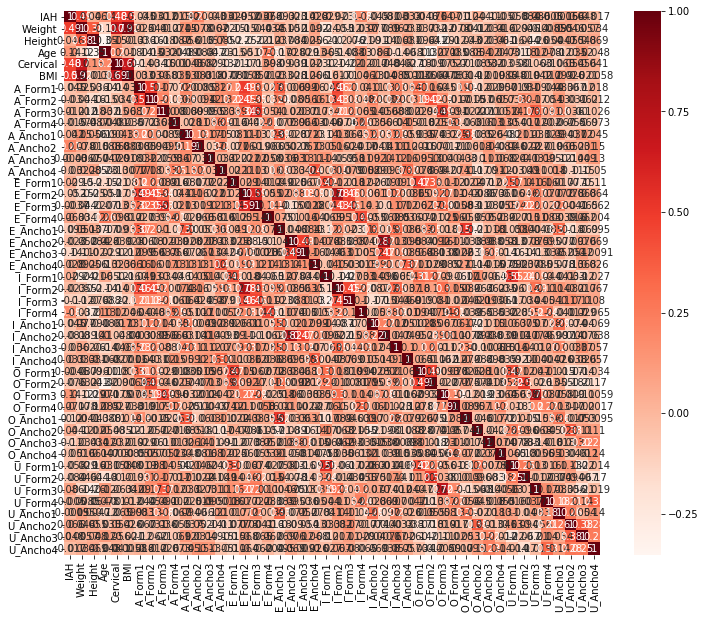

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_OSA_inner.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## For classification you can try:

### [AUC Meets the Wilcoxon-Mann-Whitney U-Statistic](https://blog.revolutionanalytics.com/2017/03/auc-meets-u-stat.html)


In [33]:

from scipy.stats import mannwhitneyu

List_Features = df_OSA_inner.columns[2:]

for FEAT in List_Features:
    data1 = df_OSA_inner[df_OSA_inner['OSA'] == 'Healthy'][FEAT]
    data2 = df_OSA_inner[df_OSA_inner['OSA'] != 'Healthy'][FEAT]
    stat, p = mannwhitneyu(data1, data2)
    print("Feature: ", FEAT, " p-value: ", p)


Feature:  IAH  p-value:  2.668948268665901e-30
Feature:  Weight  p-value:  1.0436965320992271e-06
Feature:  Age  p-value:  0.0022783299529905107
Feature:  Cervical  p-value:  1.3995233873782936e-09
Feature:  OSA  p-value:  8.3741911410896e-40
Feature:  BMI  p-value:  9.008366766130032e-08
Feature:  A_Ancho2  p-value:  0.003501353021712575
Feature:  E_Ancho3  p-value:  0.006629051435287094
Feature:  I_Form3  p-value:  0.025440484119445113
Feature:  O_Form3  p-value:  0.01608439345194229
Feature:  U_Form3  p-value:  0.028831724756362354


## You can also use already implemented Feature Selection procedures

### For example scikit-learn: $SelectKBest$

https://machinelearningmastery.com/feature-selection-machine-learning-python/

https://scikit-learn.org/stable/modules/feature_selection.html

https://www.kaggle.com/jepsds/feature-selection-using-selectkbest


In [45]:
# Feature Selection with Univariate Statistical Tests 
#(Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

# <font color=red>BUT: Know what you are doing!!!:</font>

### In https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
* Default is f_classif (see below “See also”). The default function only works with classification tasks.


* f_classif(X, y)
Compute the ANOVA F-value for the provided sample.

## ANOVA F-value For Feature Selection
[Feature selection ANOVA](https://chrisalbon.com/machine_learning/feature_selection/anova_f-value_for_feature_selection/)

If the features are categorical, calculate a chi-square (χ2
) statistic between each feature and the target vector. However, if the features are quantitative, compute the ANOVA F-value between each feature and the target vector.



### ... for testing $SelectKbest$ we will use numpy arrays for features and outcome

In [34]:
array = df_OSA_inner.values

In [35]:
type(array)

numpy.ndarray

In [36]:
df_OSA_inner.head(5)

,Patient,Gender,IAH,Weight,Height,Age,Cervical,OSA,BMI,A_Form1,...,O_Ancho3,O_Ancho4,U_Form1,U_Form2,U_Form3,U_Form4,U_Ancho1,U_Ancho2,U_Ancho3,U_Ancho4
0,P0005,hombre,9.0,80,173,32,40,Healthy,26.729927,746.822118,...,164.953071,223.771504,328.075500,757.032914,2565.730496,3024.500134,74.718076,88.331369,128.496457,379.432142
1,P0006,hombre,2.0,109,190,32,42,Healthy,30.193906,741.095216,...,74.584464,216.244108,337.409601,735.000000,2532.000000,4132.186568,68.657539,192.000000,134.000000,264.337720
2,P0007,hombre,34.0,86,169,39,42,Severe,30.110991,681.116563,...,468.000000,95.059357,370.154253,714.797758,2728.437822,3501.838315,92.078301,230.866726,87.218309,591.651748
3,P0008,hombre,60.0,145,172,47,44,Severe,49.012980,732.652369,...,107.256636,373.582142,303.000000,757.152778,2317.825661,4068.527272,197.000000,134.369532,190.933843,144.054887
4,P0013,hombre,3.7,90,180,36,40,Healthy,27.777778,741.800273,...,163.917683,174.836713,287.000000,733.000000,2296.000000,2947.386531,74.000000,175.000000,274.000000,189.966079


In [37]:
import numpy as np

In [38]:
i = 0
for name in df_OSA_inner.iloc[:,np.r_[3:7,8:49]].columns:
    print('Features position: ',i, ' Name: ', name)
    i = i + 1

Features position:  0  Name:  Weight
Features position:  1  Name:  Height
Features position:  2  Name:  Age
Features position:  3  Name:  Cervical
Features position:  4  Name:  BMI
Features position:  5  Name:  A_Form1
Features position:  6  Name:  A_Form2
Features position:  7  Name:  A_Form3
Features position:  8  Name:  A_Form4
Features position:  9  Name:  A_Ancho1
Features position:  10  Name:  A_Ancho2
Features position:  11  Name:  A_Ancho3
Features position:  12  Name:  A_Ancho4
Features position:  13  Name:  E_Form1
Features position:  14  Name:  E_Form2
Features position:  15  Name:  E_Form3
Features position:  16  Name:  E_Form4
Features position:  17  Name:  E_Ancho1
Features position:  18  Name:  E_Ancho2
Features position:  19  Name:  E_Ancho3
Features position:  20  Name:  E_Ancho4
Features position:  21  Name:  I_Form1
Features position:  22  Name:  I_Form2
Features position:  23  Name:  I_Form3
Features position:  24  Name:  I_Form4
Features position:  25  Name:  I_Anc

In [39]:
# Select Features from columns 3 to 6 and 8 to 48
X = array[:,np.r_[3:7,8:49]]

In [40]:
# see the first case
X[0,:]

array([80, 173, 32, 40, 26.72992749507167, 746.8221183776997,
       1225.417574310374, 2508.306857300249, 3775.739466857687,
       159.5404873847764, 136.2623531818225, 210.54317145345,
       310.2823270797749, 444.3294162750191, 1923.198001862062,
       2413.099987792814, 3702.694970703126, 91.37773566245373,
       180.7225533485563, 238.6456325531061, 297.4802003859751,
       280.5177970886311, 2333.900631713689, 2675.771298218249,
       3629.788195801312, 54.76846122741624, 197.0948628425313,
       350.1517065048375, 191.838788318625, 521.014667129525,
       899.3915897369754, 2450.534996033251, 3436.611940002686,
       111.1138925076081, 105.3445897102618, 164.9530711651312,
       223.7715037346062, 328.0754999161064, 757.0329143524436,
       2565.730496215877, 3024.500134277626, 74.71807608604001,
       88.3313689231932, 128.4964569091531, 379.4321424484188],
      dtype=object)

In [41]:
# Classes are in possition 7 (OSA) 
Y = array[:,7]

In [42]:
Y[0:4]

array(['Healthy', 'Healthy', 'Severe', 'Severe'], dtype=object)

## The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

In [46]:
# feature selection
selector = SelectKBest(score_func=f_classif, k=4)
selector.fit(X, Y)

SelectKBest(k=4, score_func=<function f_classif at 0x000001EB4007D2F0>)

In [47]:
# Get the raw p-values for each feature
scores = selector.pvalues_

# ...as there are very small values you could  and transform from p-values into scores
#scores = -np.log10(selector.pvalues_)

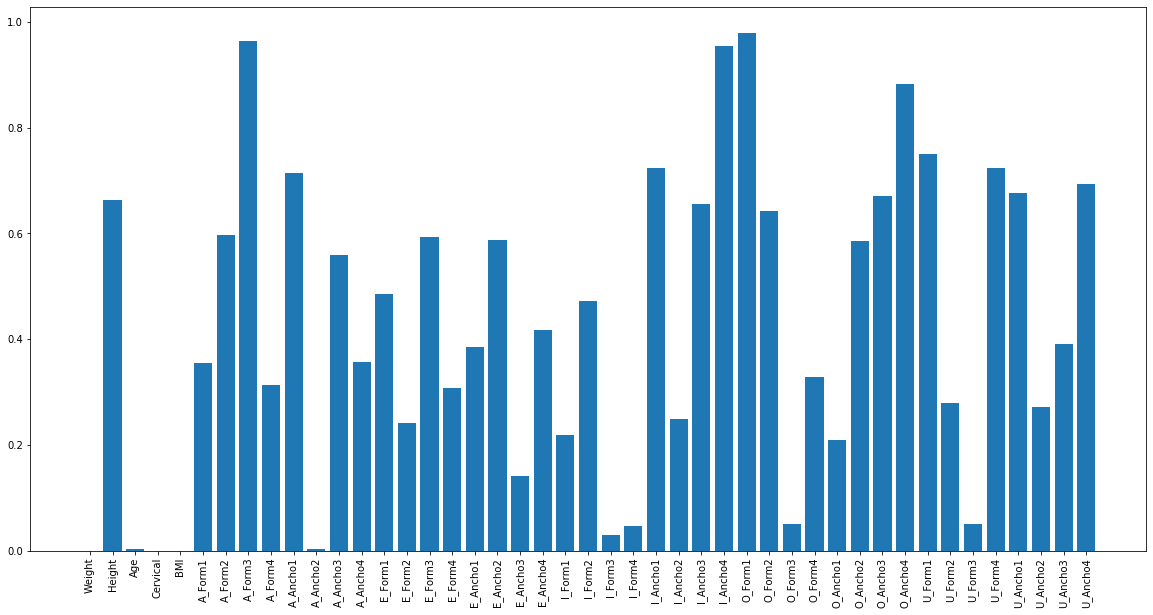

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline



# Plot the scores.  See how "Pclass", "Sex", "Title", and "Fare" are the best?
plt.figure(figsize=(20,10))
plt.bar(range(np.shape(X)[1]), scores)
plt.xticks(range(np.shape(X)[1]), predictors, rotation='vertical')
plt.show()

In [50]:
ifeat=0
for FEAT in predictors:
    p = selector.pvalues_[ifeat]
    ifeat = ifeat + 1
    if p < 0.05:
        print("Feature: ", FEAT, " p-value: ", p)

Feature:  Weight  p-value:  8.18200346766231e-07
Feature:  Age  p-value:  0.003197705106764703
Feature:  Cervical  p-value:  5.18199378130727e-09
Feature:  BMI  p-value:  5.029582313553199e-07
Feature:  A_Ancho2  p-value:  0.0037616243394976183
Feature:  I_Form3  p-value:  0.02979447496083049
Feature:  I_Form4  p-value:  0.04598472480960474
Feature:  O_Form3  p-value:  0.049349618595081454


In [115]:
selector.pvalues_[0:5]

array([8.182e-07, 6.625e-01, 3.198e-03, 5.182e-09, 5.030e-07])

In [114]:
selector.pvalues_[10]

0.0037616243394977215

'''

Scikit-learn indeed does not support stepwise regression. 
That's because what is commonly known as 'stepwise regression'
is an algorithm based on p-values of coefficients of linear regression,
and scikit-learn deliberately avoids inferential 
approach to model learning (significance testing etc). 
''''''


## 2. Recursive Feature Elimination

The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [132]:
# Feature Extraction with RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 4)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)


Num Features: 4
Selected Features: [ True  True False  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False]


## 4. Feature Importance

Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features

In [133]:
# Feature Importance with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.064 0.028 0.039 0.07  0.036 0.027 0.028 0.017 0.016 0.011 0.032 0.014
 0.009 0.028 0.008 0.017 0.018 0.018 0.025 0.025 0.016 0.015 0.01  0.025
 0.019 0.01  0.022 0.011 0.014 0.016 0.026 0.029 0.028 0.02  0.02  0.021
 0.012 0.025 0.013 0.027 0.024 0.025 0.011 0.011 0.022]


In [128]:
pd.DataFrame(X[['Weight','Height']])

,Weight,Height
0,80,173
1,109,190
2,86,169
3,145,172
4,90,180
5,89,171
6,113,177
7,107,170
8,70,174
9,100,180


## Write to an Excel file

In [53]:
df_final.to_excel (r'OSA_DB_UPM.xlsx', index = None, header=True) 

<font size= 5 color=red>----------------------------------------------------------------</font>
<font size= 5 color=red>----------------------------------------------------------------

## Now let's do some EDA and Train ML models using ScikitLearn

</font>



In [55]:
# We will use OSA_df name

OSA_df = df_final


In [56]:
OSA_df.head(5)

,Patient,Gender,IAH,Weight,Height,Age,Cervical
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0
5,P0006,hombre,2.0,109.0,190.0,32.0,42.0
6,P0007,hombre,34.0,86.0,169.0,39.0,42.0


In [57]:
OSA_df.dtypes

Patient      object
Gender       object
IAH         float64
Weight      float64
Height      float64
Age         float64
Cervical    float64
dtype: object

In [75]:
OSA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637 entries, P0002 to P0683
Data columns (total 6 columns):
Gender      637 non-null object
IAH         637 non-null float64
Weight      637 non-null float64
Height      637 non-null float64
Age         637 non-null float64
Cervical    637 non-null float64
dtypes: float64(5), object(1)
memory usage: 54.8+ KB


![Image Pandas Indexing](https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2016/10/Pandas-selections-and-indexing-768x549.png)
[Pandas DataFrame Indexing](https://www.shanelynn.ie/select-pandas-dataframe-rows-and-columns-using-iloc-loc-and-ix/)

In [63]:
OSA_df.iloc[0:4,]

,Patient,Gender,IAH,Weight,Height,Age,Cervical
1,P0002,hombre,29.6,119.0,174.0,56.0,48.0
3,P0004,hombre,19.7,78.0,168.0,39.0,42.0
4,P0005,hombre,9.0,80.0,173.0,32.0,40.0
5,P0006,hombre,2.0,109.0,190.0,32.0,42.0


In [ ]:
OSA_df.set_index("Patient", inplace=True)

In [77]:
OSA_df.index

Index(['P0002', 'P0004', 'P0005', 'P0006', 'P0007', 'P0008', 'P0009', 'P0010',
       'P0013', 'P0014',
       ...
       'P0672', 'P0673', 'P0674', 'P0675', 'P0676', 'P0677', 'P0679', 'P0680',
       'P0682', 'P0683'],
      dtype='object', name='Patient', length=637)

In [73]:
OSA_df.loc[['P0002','P0006']]

,Gender,IAH,Weight,Height,Age,Cervical
Patient,,,,,,
P0002,hombre,29.6,119.0,174.0,56.0,48.0
P0006,hombre,2.0,109.0,190.0,32.0,42.0


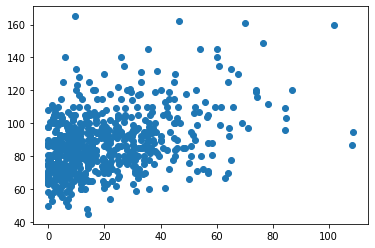

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(OSA_df['IAH'],OSA_df['Weight'])

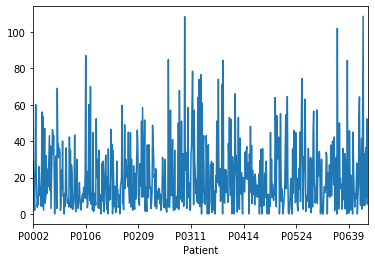

In [80]:
OSA_df['IAH'].plot()


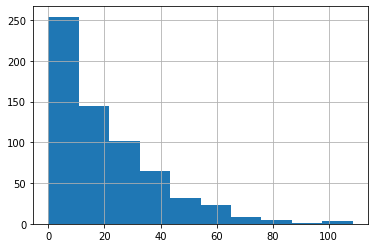

In [81]:
OSA_df['IAH'].hist()

# .describe()   .mean()

In [84]:
# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix

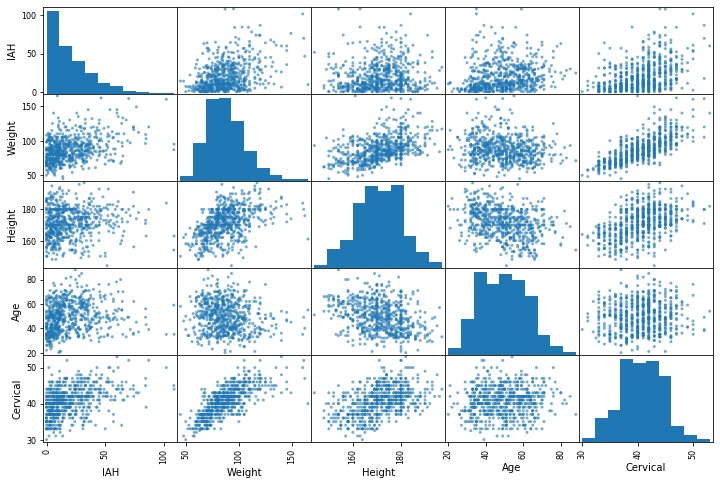

In [87]:
axes = scatter_matrix(OSA_df, alpha=0.6, figsize=(12, 8), diagonal='hist')

# diagonal = 'kde'

## [scikit-learn: Machine Learning in Python](http://scikit-learn.org/stable/)
![Scikit-learn Image](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

## Python ML <font color='blue'>sklearn</font> for Multiple Linear Regression

In [88]:

### Picking predictor columns

# Get all the columns from the dataframe.
columns = OSA_df.columns.tolist()

# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["IAH","Gender"]]

# Store the variable we'll be predicting on.
target = "IAH"

print('Predictors: ',columns)

Predictors:  ['Weight', 'Height', 'Age', 'Cervical']


In [89]:
# Splitting into train and test sets

# Generate the training set.  Set random_state to be able to replicate results.
train = OSA_df.sample(frac=0.8, random_state=1)


# Select anything not in the training set and put it in the testing set.
test = OSA_df.loc[~OSA_df.index.isin(train.index)]

# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(510, 6)
(127, 6)


## TRAIN:

In [90]:
# Fitting a linear regression

# Import the linear models.
from sklearn import linear_model

# Initialize the model class.

model= linear_model.LinearRegression()

#model= linear_model.Ridge(alpha = 0.5)
# Fit the model to the training data.
Trained_model=model.fit(train[columns], train[target])

## Test

In [91]:
### Predicting Error

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictions = model.predict(test[columns])

# Compute error between our test predictions and the actual values.
MSE=mean_squared_error(predictions, test[target])

print('Mean squared Error: ', MSE)

Mean squared Error:  331.3758970696594


In [92]:
# Explained variance score: 
from sklearn.metrics import r2_score

print('Variance score: %.2f' % r2_score(test[target], predictions))

Variance score: 0.22


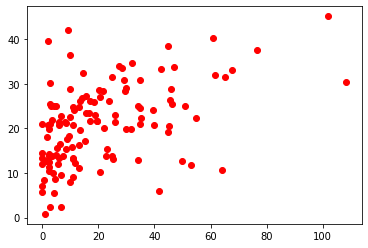

In [93]:
# Plot outputs
plt.scatter(test[target], predictions,  color='red')

plt.show()

## Try improve using "feature" engineering ...  BMI, ....  (log(AHI))